##### We build our model after feature selection,scaling and over-sampling

In [4]:
import os
import warnings
warnings.filterwarnings('ignore')

# Basics
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Train Test Split
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

# Imbalanced Dataset
from imblearn.over_sampling import SMOTE

# Standard Scaler
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,auc


# Ensemble Techniques
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Stacking
from mlxtend.classifier import StackingClassifier
from vecstack import stacking

# PCA
from sklearn.decomposition import PCA

In [5]:
data=pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [7]:
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['Month'].value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

In [8]:
le = LabelEncoder()
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['VisitorType'].value_counts()

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64

In [9]:
le = LabelEncoder()
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [10]:
y=data['Revenue']
X=data.drop(['Revenue','Region','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# train = pd.concat([X_train, y_train], axis=1)
# train.head()

In [12]:
# no_tra = train[train.Revenue==0]
# tra = train[train.Revenue==1]
# no_tra_downsampled = resample(no_tra,
#                                 replace = False,
#                                 n_samples = len(tra),
#                                 random_state = 27)

In [13]:
# downsampled = pd.concat([no_tra_downsampled,tra])
# downsampled.Revenue.value_counts()

In [14]:
# y_train = downsampled.Revenue
# X_train = downsampled.drop('Revenue', axis=1)

In [15]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
sm=SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

# MODELS

## Logistic Regression

In [17]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [18]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 82.54982115482882
Test Score : 86.21472591631529
Precision : 86.21472591631529
Recall : 86.21472591631529
F1 Score : 62.75197195442595
AUC Score : 80.93839330340742
Confusion matrix:  [[2300  294]
 [ 131  358]]


In [19]:
results=confusion_matrix(y_test,y_pred)
results

array([[2300,  294],
       [ 131,  358]], dtype=int64)

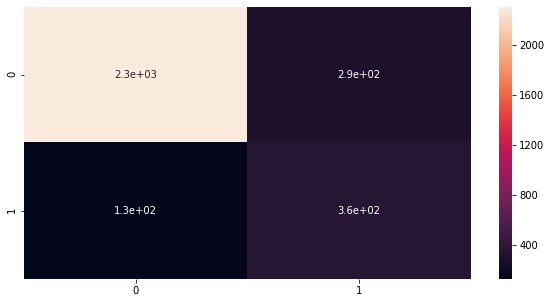

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(results,annot=True)

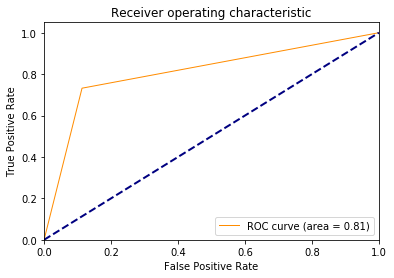

In [21]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
lw=2
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
# feature_imp = pd.Series(classifier.feature_importance,index=feature_names).sort_values(ascending=False)
# feature_imp

In [23]:
# sns.barplot(feature_imp,feature_imp.index)
# plt.xlabel('Feature Importance Score')
# plt.ylabel('Features')
# plt.title('Importance of Features')
# plt.show()

## Decision Tree

In [24]:
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [25]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 100.0
Test Score : 83.97664612390528
Precision : 83.97664612390528
Recall : 83.97664612390528
F1 Score : 54.34380776340111
AUC Score : 74.29804977035255
Confusion matrix:  [[2295  299]
 [ 195  294]]


In [26]:
param_grid={
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'splitter':['best','random'],
    'max_depth':[5,10,15]
}

In [27]:
CV_dt=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=5)
CV_dt.fit(X_train,y_train)
y_pred=CV_dt.predict(X_test)

In [28]:
print(CV_dt.best_score_)
print(CV_dt.best_params_)
print(CV_dt.best_estimator_)

0.8914827337387058
{'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'splitter': 'best'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


In [29]:
print('Train Score :',CV_dt.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 95.35002554931017
Test Score : 84.59292896529355
Precision : 84.59292896529355
Recall : 84.59292896529355
F1 Score : 59.366980325064155
AUC Score : 79.06191415457727
Confusion matrix:  [[2261  333]
 [ 142  347]]


## Random Forest

In [30]:
classifier=RandomForestClassifier(n_estimators=50)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [31]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 99.98722534491569
Test Score : 88.19331819656179
Precision : 88.19331819656179
Recall : 88.19331819656179
F1 Score : 67.02898550724638
AUC Score : 83.10987444677271
Confusion matrix:  [[2349  245]
 [ 119  370]]


In [32]:
param_grid={
    'criterion':['gini','entropy'],
    'n_estimators':[100,75,50],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[5,8,10]
}

In [33]:
CV_rfc=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=5)
CV_rfc.fit(X_train,y_train)
y_pred=CV_dt.predict(X_test)

In [34]:
print(CV_rfc.best_score_)
print(CV_rfc.best_params_)
print(CV_rfc.best_estimator_)

0.9070668913387445
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 75}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [35]:
print('Train Score :',CV_rfc.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 92.61624936126725
Test Score : 84.59292896529355
Precision : 84.59292896529355
Recall : 84.59292896529355
F1 Score : 59.366980325064155
AUC Score : 79.06191415457727
Confusion matrix:  [[2261  333]
 [ 142  347]]


## K-NN

In [36]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [37]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 92.9292284108329
Test Score : 81.05741161206616
Precision : 81.05741161206616
Recall : 81.05741161206616
F1 Score : 53.87045813586098
AUC Score : 76.4630664125014
Confusion matrix:  [[2158  436]
 [ 148  341]]


In [38]:
k_range=range(1,31)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

Text(0, 0.5, 'Cross-Validated-Accuracy')

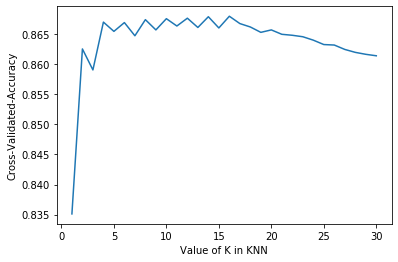

In [39]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K in KNN')
plt.ylabel('Cross-Validated-Accuracy')

In [40]:
k_scores.index(max(k_scores))

15

In [41]:
classifier=KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [42]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 88.48364844149208
Test Score : 79.37074278300356
Precision : 79.37074278300356
Recall : 79.37074278300356
F1 Score : 53.166421207658324
AUC Score : 77.12023814591798
Confusion matrix:  [[2086  508]
 [ 128  361]]


In [43]:
k_range=list(range(1,31))
weight_options=['uniform','distance']

In [44]:
param_grid=dict(n_neighbors=k_range,weights=weight_options)
knn=KNeighborsClassifier()

In [45]:
grid=GridSearchCV(knn,param_grid,cv=10,scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [46]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8679643146796432
{'n_neighbors': 16, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')


In [47]:
classifier=KNeighborsClassifier(n_neighbors=16,weights='uniform')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [48]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 88.40061318344404
Test Score : 80.60330846578009
Precision : 80.60330846578009
Recall : 80.60330846578009
F1 Score : 53.929121725731896
AUC Score : 76.93998104797448
Confusion matrix:  [[2135  459]
 [ 139  350]]


## Naive Bayes

In [49]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [50]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 76.43714869698518
Test Score : 69.67239701589361
Precision : 69.67239701589361
Recall : 69.67239701589361
F1 Score : 45.67112144102266
AUC Score : 74.01211384459654
Confusion matrix:  [[1755  839]
 [  96  393]]


# ENSEMBLE TECHNIQUES

## Bagging- Logistic

In [51]:
model = BaggingClassifier(base_estimator=LogisticRegression(random_state=0),random_state=0)
model.fit(X_train, y_train)
print(model)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=0,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbo

In [52]:
y_pred = model.predict(X_test)

In [53]:
print('Train Score :',model.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 82.60091977516608
Test Score : 86.5066493674992
Precision : 86.5066493674992
Recall : 86.5066493674992
F1 Score : 63.38028169014084
AUC Score : 81.27781903496033
Confusion matrix:  [[2307  287]
 [ 129  360]]


## Bagging- Decision Tree

In [54]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=5,max_features='auto',splitter='best'),random_state=0)
model.fit(X_train, y_train)
print(model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=0,
    

In [55]:
y_pred = model.predict(X_test)

In [56]:
print('Train Score :',model.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 87.69800715380684
Test Score : 87.34998378203049
Precision : 87.34998378203049
Recall : 87.34998378203049
F1 Score : 67.06081081081082
AUC Score : 84.84902236244409
Confusion matrix:  [[2296  298]
 [  92  397]]


## Bagging-KNN

In [57]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=16,weights='uniform'),random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=16, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)


In [58]:
print('Train Score :',model.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 88.18983137455288
Test Score : 80.0518975024327
Precision : 80.0518975024327
Recall : 80.0518975024327
F1 Score : 54.00149588631265
AUC Score : 77.52501840806138
Confusion matrix:  [[2107  487]
 [ 128  361]]


## Bagging-Naive Bayes

In [59]:
model = BaggingClassifier(base_estimator=GaussianNB(),random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)


In [60]:
print('Train Score :',model.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 76.32856412876853
Test Score : 69.477781381771
Precision : 69.477781381771
Recall : 69.477781381771
F1 Score : 45.51244933410538
AUC Score : 73.896462341127
Confusion matrix:  [[1749  845]
 [  96  393]]


## Boosting-Logistic

In [61]:
classifier = AdaBoostClassifier(
    LogisticRegression(random_state=0),
    n_estimators=200
)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [62]:
print('Train Score :',model.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 76.32856412876853
Test Score : 78.91663963671748
Precision : 78.91663963671748
Recall : 78.91663963671748
F1 Score : 52.06489675516224
AUC Score : 76.18659073242799
Confusion matrix:  [[2080  514]
 [ 136  353]]


## Boosting-Decision Tree

In [63]:
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [64]:
print('Train Score :',model.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 76.32856412876853
Test Score : 88.06357444048005
Precision : 88.06357444048005
Recall : 88.06357444048005
F1 Score : 65.47842401500937
AUC Score : 81.2903144427994
Confusion matrix:  [[2366  228]
 [ 140  349]]


## Boosting-Random Forest

In [65]:
classifier = AdaBoostClassifier(
    RandomForestClassifier(max_depth=1),
    n_estimators=200
)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [66]:
print('Train Score :',model.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 76.32856412876853
Test Score : 88.42036976970483
Precision : 88.42036976970483
Recall : 88.42036976970483
F1 Score : 67.03601108033241
AUC Score : 82.66398153360043
Confusion matrix:  [[2363  231]
 [ 126  363]]


## Boosting-Naive Bayes

In [67]:
classifier = AdaBoostClassifier(
    GaussianNB(),
    n_estimators=200
)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [68]:
print('Train Score :',model.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 76.32856412876853
Test Score : 68.76419072332143
Precision : 68.76419072332143
Recall : 68.76419072332143
F1 Score : 29.55376737381126
AUC Score : 57.62432733711428
Confusion matrix:  [[1918  676]
 [ 287  202]]


## Stacking

In [69]:
models = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=5,max_features='auto',splitter='best'),
    RandomForestClassifier(random_state=0,criterion='entropy',max_depth=10,max_features='sqrt',n_estimators=75)
]

In [70]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LogisticRegression]
    fold  0:  [0.82754216]
    fold  1:  [0.82524272]
    fold  2:  [0.82166582]
    fold  3:  [0.82652018]
    ----
    MEAN:     [0.82524272] + [0.00222000]
    FULL:     [0.82524272]

model  1:     [DecisionTreeClassifier]
    fold  0:  [0.87966275]
    fold  1:  [0.88809402]
    fold  2:  [0.86280020]
    fold  3:  [0.87531937]
    ----
    MEAN:     [0.87646909] + [0.00913097]
    FULL:     [0.87646909]

model  2:     [RandomForestClassifier]
    fold  0:  [0.90878896]
    fold  1:  [0.90981094]
    fold  2:  [0.89141543]
    fold  3:  [0.90291262]
    ----
    MEAN:     [0.90323199] + [0.00731258]
    FULL:     [0.90323199]



## PCA

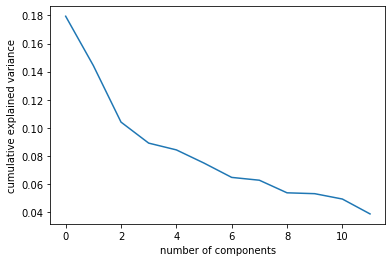

In [71]:
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [72]:
pca=PCA(6)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

## Logistic Regression

In [73]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [74]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 81.98773633111905
Test Score : 87.05806033084657
Precision : 87.05806033084657
Recall : 87.05806033084657
F1 Score : 64.53333333333335
AUC Score : 81.85442100931361
Confusion matrix:  [[2321  273]
 [ 126  363]]


## Decision Tree

In [75]:
classifier=DecisionTreeClassifier(random_state=0,criterion='gini',max_depth=5,max_features='auto',splitter='best')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [76]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 82.90112416964742
Test Score : 83.6198507946805
Precision : 83.6198507946805
Recall : 83.6198507946805
F1 Score : 59.95241871530532
AUC Score : 81.0558580206328
Confusion matrix:  [[2200  394]
 [ 111  378]]


## Random Forest

In [77]:
classifier=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='sqrt',n_estimators=75)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [78]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 90.52120592743996
Test Score : 85.59844307492702
Precision : 85.59844307492702
Recall : 85.59844307492702
F1 Score : 62.626262626262616
AUC Score : 81.73380287686072
Confusion matrix:  [[2267  327]
 [ 117  372]]


## K-NN

In [79]:
classifier=KNeighborsClassifier(n_neighbors=16,weights='uniform')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [80]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 87.80659172202351
Test Score : 81.90074602659747
Precision : 81.90074602659747
Recall : 81.90074602659747
F1 Score : 57.3394495412844
AUC Score : 79.78534702546224
Confusion matrix:  [[2150  444]
 [ 114  375]]


## Naive Bayes

In [81]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [82]:
print('Train Score :',classifier.score(X_train, y_train)*100)
print('Test Score :',accuracy_score(y_test, y_pred)*100)
print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
print('F1 Score :',f1_score(y_test,y_pred)*100)
print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
print('Confusion matrix: ',confusion_matrix(y_test,y_pred))

Train Score : 71.62110373019928
Test Score : 84.13882581900745
Precision : 84.13882581900745
Recall : 84.13882581900745
F1 Score : 51.43992055610725
AUC Score : 71.49032768714336
Confusion matrix:  [[2335  259]
 [ 230  259]]
